In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('BostonHousing.csv')

In [6]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [33]:
X = df.drop(['medv'],axis=1)
y = df['medv']

In [34]:
scl = StandardScaler()
columns = X.columns
X = scl.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

In [36]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (354, 13)
y_train shape (354,)
X_test shape (152, 13)
y_test shape (152,)


In [81]:
class NN:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate):
        self.weights_input_hidden = np.random.uniform(-0.5,0.5,(hidden_neurons, input_neurons))
        self.weights_hidden_output = np.random.uniform(-0.5,0.5,(output_neurons, hidden_neurons))
        self.lr=learning_rate
    
    def activation(self, x):
        return 1/(1+np.exp(-x))
    
    def forward(self, inputs):
        self.inputs = np.array(inputs, ndmin=2).T
        
        self.hidden_inputs = np.dot(self.weights_input_hidden, self.inputs)
        self.hidden_outputs = self.activation(self.hidden_inputs)
        
        output_hidden = np.dot(self.weights_hidden_output, self.hidden_outputs)
        final_outputs = output_hidden

        return final_outputs

    def backward(self, actual, prediction):
        output_error = actual-prediction
        self.weights_hidden_output += (self.lr)*output_error*self.hidden_outputs.T
        
        hidden_grad = np.dot(self.weights_hidden_output.T, output_error)*(self.hidden_outputs*(1-self.hidden_outputs))
        self.weights_input_hidden += (self.lr)*hidden_grad * self.inputs.T

        
    def MSE(self, actual, prediction):
        return (np.sum(actual-prediction)**2)/len(actual)

In [82]:
X_train.shape[1]

13

In [89]:
input_neurons = X_train.shape[1]
hidden_neurons = 32
output_neurons = 1
learning_rate = 0.01
epochs=1000
model = NN(input_neurons, hidden_neurons, output_neurons, learning_rate)

In [90]:
import sys
losses= {'train':[], 'test':[]}
for i in range(epochs):
    batch = np.random.choice(X_train.index, size= 8)
    for record, target in zip(X_train.loc[batch].values, y_train.loc[batch].values):
        preds = model.forward(record)
        model.backward(target, preds)
    train_loss = model.MSE(y_train, model.forward(X_train)[0])
    test_loss = model.MSE(y_test, model.forward(X_test)[0])

    sys.stdout.write("\r PROGRES : "+ str (100*i/float(epochs))[:4] + "%.. Training loss : "+str(train_loss)[:5]+"%.. Testing loss : "+str(test_loss)[:5])
    losses['train'].append(train_loss)
    losses['test'].append(test_loss)

 PROGRES : 99.9%.. Training loss : 1.406%.. Testing loss : 26.40

In [91]:
result = pd.DataFrame()
result['Preds'] = model.forward(X_test)[0]
result['Actual'] = y_test.values
result

,Preds,Actual
0,23.144867,22.9
1,36.176326,33.2
2,26.424523,26.4
3,46.940840,50.0
4,20.275342,23.4
...,...,...
147,23.312275,20.0
148,26.732945,20.6
149,26.150070,22.6
150,28.091166,24.3


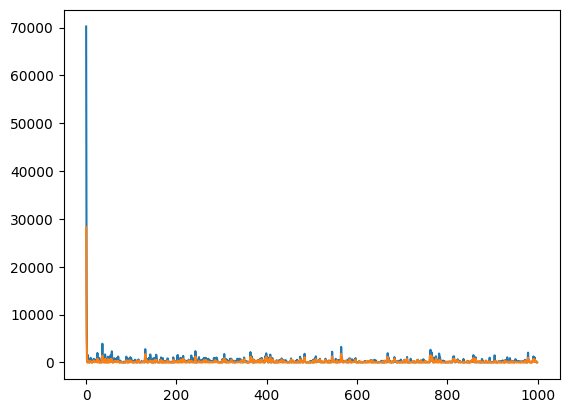

In [93]:
plt.plot(losses['train'],label='Training Loss')
plt.plot(losses['test'],label='Testing Loss')